# Parameter Tuning

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Import essential packages
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

# sklearn helper modules
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Grid Search, Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate

# Scoring function
from sklearn.metrics import accuracy_score, f1_score

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

# Set seed for reproducilibity
np.random.seed(0)

# Define data paths that are necessary
DPATH = "../data/"
IPATH = "../images/"
RPATH = "../results/"
CNPATH = "../data/control/"
CDPATH = "../data/condition/"
PSPATH = "../parameter_search/"

## 1. Load Dataset

In [2]:
# Load dataset
X = np.load(DPATH+"final_X.npy")
X_norm = np.load(DPATH+"final_X_norm.npy")
y = np.load(DPATH+"final_y.npy")
y = y.reshape(-1, )

pca = PCA()
X_transformed = pca.fit_transform(X)

print(X.shape, y.shape, X_transformed.shape)

(773, 1440) (773,) (773, 773)


In [38]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.20, random_state=42)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=42)
X_val_norm, X_test_norm, y_val, y_test = train_test_split(X_test_norm, y_test, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train_norm.shape, X_val_norm.shape, X_test_norm.shape)

(618, 1440) (124, 1440) (31, 1440)
(618, 1440) (124, 1440) (31, 1440)


## 2. Models

### 2.1 Logistic Regression

In [4]:
# GridSearch for LR
parameters = {"penalty":["l1", "l2", "elasticnet", None], "C":[0.1, 0.5, 1, 10, 50], "solver":["liblinear","saga"]}
model = LogisticRegression(max_iter=1000, random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "lr_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,4.054321,0.030280,0.003227,0.003933,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
35,4.049916,0.021175,0.003295,0.003906,50,l2,saga,"{'C': 50, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
33,5.603565,0.044454,0.001299,0.000161,50,l1,saga,"{'C': 50, 'penalty': 'l1', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
31,4.066092,0.016180,0.001743,0.001167,10,None,saga,"{'C': 10, 'penalty': None, 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
27,4.093016,0.013399,0.001212,0.000129,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
25,5.598317,0.031004,0.001715,0.000870,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
23,4.145363,0.011625,0.001567,0.000497,1,None,saga,"{'C': 1, 'penalty': None, 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
17,5.572654,0.022961,0.001315,0.000373,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
15,4.021732,0.010588,0.002045,0.001905,0.5,None,saga,"{'C': 0.5, 'penalty': None, 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1
11,4.021353,0.003121,0.001146,0.000210,0.5,l2,saga,"{'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.489796,0.595745,0.500000,0.463158,0.513740,0.044910,1


In [5]:
# GridSearch for LR, Normalized Data
parameters = {"penalty":["l1", "l2", "elasticnet", None], "C":[0.1, 0.5, 1, 10, 50], "solver":["liblinear","saga"]}

model = LogisticRegression(max_iter=1000, random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "lr_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,2.135358,0.097237,0.001732,0.000799,0.1,l2,saga,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.514851,0.525253,0.556701,0.565657,0.541667,0.540826,0.018902,1
8,0.068954,0.004601,0.001227,0.000416,0.5,l1,liblinear,"{'C': 0.5, 'penalty': 'l1', 'solver': 'libline...",0.528302,0.543689,0.543478,0.554455,0.526316,0.539248,0.010545,2
2,0.124655,0.001682,0.001127,0.000427,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.514851,0.510204,0.556701,0.565657,0.547368,0.538956,0.022389,3
10,0.163504,0.006274,0.001475,0.000223,0.5,l2,liblinear,"{'C': 0.5, 'penalty': 'l2', 'solver': 'libline...",0.514851,0.510204,0.556701,0.551020,0.541667,0.534889,0.018936,4
19,4.051831,0.021212,0.001536,0.000330,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.500000,0.556701,0.551020,0.541667,0.533878,0.021051,5
35,4.108463,0.030441,0.004592,0.004061,50,l2,saga,"{'C': 50, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.500000,0.556701,0.551020,0.541667,0.533878,0.021051,5
33,6.387572,0.050539,0.003103,0.002052,50,l1,saga,"{'C': 50, 'penalty': 'l1', 'solver': 'saga'}",0.520000,0.500000,0.556701,0.551020,0.541667,0.533878,0.021051,5
31,4.033683,0.008679,0.001749,0.000565,10,None,saga,"{'C': 10, 'penalty': None, 'solver': 'saga'}",0.520000,0.500000,0.556701,0.551020,0.541667,0.533878,0.021051,5
27,4.049051,0.008630,0.001572,0.000465,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.520000,0.500000,0.556701,0.551020,0.541667,0.533878,0.021051,5
23,4.043694,0.012389,0.003814,0.003834,1,None,saga,"{'C': 1, 'penalty': None, 'solver': 'saga'}",0.520000,0.500000,0.556701,0.551020,0.541667,0.533878,0.021051,5


In [9]:
# GridSearch for LR, Standard Scaler
parameters = {"lr__penalty":["l1", "l2", "elasticnet", None], "lr__C":[0.1, 0.5, 1, 10, 50], \
              "lr__solver":["liblinear","saga"]}

model = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "lr_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.126673,0.004722,0.001369,0.000335,0.1,l2,liblinear,"{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solve...",0.632479,0.618182,0.636364,0.596154,0.697248,0.636085,0.033672,1
0,0.034028,0.004499,0.001637,0.000342,0.1,l1,liblinear,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.621359,0.653846,0.576923,0.625000,0.702703,0.635966,0.041456,2
9,6.992535,0.154952,0.004985,0.002453,0.5,l1,saga,"{'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solve...",0.647619,0.615385,0.600000,0.639175,0.666667,0.633769,0.023587,3
26,0.158479,0.005420,0.001477,0.000579,10,l2,liblinear,"{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver...",0.631579,0.600000,0.648148,0.601942,0.672727,0.630879,0.027716,4
34,0.168533,0.004166,0.001504,0.000657,50,l2,liblinear,"{'lr__C': 50, 'lr__penalty': 'l2', 'lr__solver...",0.631579,0.611111,0.642202,0.601942,0.666667,0.630700,0.022967,5
19,4.093000,0.032157,0.003734,0.003901,1,l2,saga,"{'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver'...",0.626087,0.611111,0.629630,0.601942,0.672897,0.628333,0.024437,6
25,7.351635,0.143015,0.001812,0.000284,10,l1,saga,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",0.625000,0.605505,0.629630,0.601942,0.678899,0.628195,0.027522,7
1,5.406250,0.358716,0.004587,0.004121,0.1,l1,saga,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.621359,0.640777,0.562500,0.623656,0.690909,0.627840,0.041168,8
10,0.137843,0.005499,0.003657,0.001794,0.5,l2,liblinear,"{'lr__C': 0.5, 'lr__penalty': 'l2', 'lr__solve...",0.608696,0.605505,0.648148,0.596154,0.678899,0.627480,0.031267,9
18,0.153325,0.006680,0.002068,0.001220,1,l2,liblinear,"{'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver'...",0.608696,0.605505,0.648148,0.596154,0.678899,0.627480,0.031267,9


In [10]:
# GridSearch for LR, Normalized Data, Standard Scaler
parameters = {"lr__penalty":["l1", "l2", "elasticnet", None], "lr__C":[0.1, 0.5, 1, 10, 50], \
              "lr__solver":["liblinear","saga"]}

model = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "lr_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,3.984514,0.146913,0.002262,0.000552,0.5,l2,saga,"{'lr__C': 0.5, 'lr__penalty': 'l2', 'lr__solve...",0.568627,0.574074,0.601942,0.582524,0.607843,0.587002,0.015378,1
33,6.288773,0.120533,0.002269,0.000855,50,l1,saga,"{'lr__C': 50, 'lr__penalty': 'l1', 'lr__solver...",0.563107,0.574074,0.596154,0.601942,0.596154,0.586286,0.015008,2
25,7.643424,0.093044,0.002563,0.001604,10,l1,saga,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",0.549020,0.587156,0.609524,0.594059,0.588235,0.585599,0.019957,3
19,4.076946,0.013883,0.003856,0.003828,1,l2,saga,"{'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver'...",0.563107,0.574074,0.596154,0.582524,0.607843,0.584740,0.015816,4
27,4.071992,0.005979,0.003750,0.004125,10,l2,saga,"{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver...",0.563107,0.574074,0.596154,0.582524,0.601942,0.583560,0.014184,5
2,0.135541,0.011261,0.001517,0.000286,0.1,l2,liblinear,"{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solve...",0.563107,0.568807,0.603774,0.571429,0.607843,0.582992,0.018867,6
0,0.040357,0.012557,0.003498,0.001298,0.1,l1,liblinear,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.639175,0.574257,0.574257,0.533333,0.592593,0.582723,0.034255,7
7,4.066844,0.026144,0.003167,0.001943,0.1,None,saga,"{'lr__C': 0.1, 'lr__penalty': None, 'lr__solve...",0.563107,0.574074,0.596154,0.582524,0.596154,0.582403,0.012805,8
35,4.019942,0.002902,0.004539,0.004214,50,l2,saga,"{'lr__C': 50, 'lr__penalty': 'l2', 'lr__solver...",0.563107,0.574074,0.596154,0.582524,0.596154,0.582403,0.012805,8
31,4.136225,0.046757,0.003766,0.003895,10,None,saga,"{'lr__C': 10, 'lr__penalty': None, 'lr__solver...",0.563107,0.574074,0.596154,0.582524,0.596154,0.582403,0.012805,8


---
### 2.2 Random Forest Classifier

In [11]:
# GridSearch for RF
parameters = {'n_estimators':[50, 100, 150], 'min_samples_split':[2, 4], 'max_features':["sqrt", "log2"]}

model = RandomForestClassifier(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "rf_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.255486,0.010970,0.003250,0.000105,sqrt,2,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.652174,0.635294,0.568421,0.635294,0.659341,0.630105,0.032251,3
1,0.539487,0.007766,0.005477,0.000091,sqrt,2,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.600000,0.650602,0.565217,0.627907,0.731183,0.634982,0.055928,1
2,0.693987,0.012143,0.007875,0.000230,sqrt,2,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.600000,0.642857,0.516854,0.619048,0.731183,0.621988,0.069144,7
3,0.228554,0.002945,0.003176,0.000023,sqrt,4,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.623656,0.651685,0.516129,0.595238,0.711111,0.619564,0.064374,8
4,0.454350,0.004634,0.005418,0.000010,sqrt,4,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.600000,0.666667,0.533333,0.617284,0.747253,0.632907,0.071353,2
5,0.683425,0.005162,0.007770,0.000238,sqrt,4,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.637363,0.711111,0.516854,0.567901,0.711111,0.628868,0.077284,5
6,0.089228,0.000447,0.003265,0.000053,log2,2,50,"{'max_features': 'log2', 'min_samples_split': ...",0.617021,0.666667,0.488889,0.545455,0.704545,0.604515,0.078591,10
7,0.176381,0.000818,0.005586,0.000070,log2,2,100,"{'max_features': 'log2', 'min_samples_split': ...",0.586957,0.571429,0.500000,0.560976,0.697674,0.583407,0.064301,12
8,0.264498,0.001694,0.008139,0.000415,log2,2,150,"{'max_features': 'log2', 'min_samples_split': ...",0.586957,0.595238,0.511111,0.575000,0.727273,0.599116,0.070588,11
9,0.088593,0.000413,0.003288,0.000058,log2,4,50,"{'max_features': 'log2', 'min_samples_split': ...",0.593407,0.702128,0.500000,0.602410,0.747253,0.629039,0.087116,4


In [12]:
# GridSearch for RF, Normalized Data
parameters = {'n_estimators':[50, 100, 150], 'min_samples_split':[2, 4], 'max_features':["sqrt", "log2"]}

model = RandomForestClassifier(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "rf_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.274521,0.004981,0.003205,0.000095,sqrt,2,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.693069,0.747475,0.787234,0.741573,0.800000,0.753870,0.037762,10
1,0.543643,0.007790,0.005527,0.000148,sqrt,2,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.700000,0.745098,0.808081,0.821053,0.808081,0.776462,0.046514,1
2,0.817716,0.009553,0.007800,0.000184,sqrt,2,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.666667,0.752475,0.804124,0.800000,0.800000,0.764653,0.052548,9
3,0.275730,0.005754,0.003157,0.000014,sqrt,4,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.666667,0.760000,0.755102,0.787234,0.791667,0.752134,0.045100,12
4,0.545786,0.009782,0.005393,0.000019,sqrt,4,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.712871,0.754717,0.775510,0.824742,0.811881,0.775944,0.040253,2
5,0.819380,0.011316,0.007615,0.000019,sqrt,4,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.712871,0.777778,0.784314,0.795699,0.795918,0.773316,0.031004,4
6,0.100627,0.001282,0.003429,0.000337,log2,2,50,"{'max_features': 'log2', 'min_samples_split': ...",0.693069,0.784314,0.714286,0.750000,0.820000,0.752334,0.045971,11
7,0.199774,0.002394,0.005648,0.000141,log2,2,100,"{'max_features': 'log2', 'min_samples_split': ...",0.693878,0.803922,0.764706,0.777778,0.811881,0.770433,0.041921,8
8,0.299474,0.002982,0.007941,0.000239,log2,2,150,"{'max_features': 'log2', 'min_samples_split': ...",0.686869,0.796117,0.764706,0.764045,0.843137,0.770975,0.050992,6
9,0.099758,0.000553,0.003258,0.000050,log2,4,50,"{'max_features': 'log2', 'min_samples_split': ...",0.725490,0.792453,0.764706,0.777778,0.803922,0.772870,0.027141,5


In [13]:
# GridSearch for RF, Standard Scaler
parameters = {'rf__n_estimators':[50, 100, 150], 'rf__min_samples_split':[2, 4], \
              'rf__max_features':["sqrt", "log2"]}

model = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "rf_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.237097,0.004547,0.003791,0.000122,sqrt,2,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.652174,0.635294,0.568421,0.635294,0.659341,0.630105,0.032251,3
1,0.461458,0.005484,0.005997,0.000207,sqrt,2,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.600000,0.650602,0.565217,0.627907,0.731183,0.634982,0.055928,1
2,0.689025,0.007309,0.008125,0.000037,sqrt,2,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.600000,0.642857,0.516854,0.619048,0.731183,0.621988,0.069144,7
3,0.233931,0.002897,0.003580,0.000012,sqrt,4,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.623656,0.651685,0.516129,0.602410,0.711111,0.620998,0.063894,8
4,0.463517,0.007648,0.006095,0.000266,sqrt,4,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.600000,0.666667,0.533333,0.617284,0.733333,0.630123,0.066975,2
5,0.693450,0.009069,0.008181,0.000102,sqrt,4,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.637363,0.711111,0.516854,0.567901,0.711111,0.628868,0.077284,5
6,0.095057,0.000711,0.003655,0.000015,log2,2,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.617021,0.666667,0.488889,0.545455,0.704545,0.604515,0.078591,10
7,0.181818,0.000598,0.005951,0.000027,log2,2,100,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.586957,0.588235,0.500000,0.560976,0.697674,0.586768,0.064026,12
8,94.286122,188.004871,0.009642,0.001720,log2,2,150,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.586957,0.595238,0.511111,0.575000,0.727273,0.599116,0.070588,11
9,0.095624,0.000657,0.003725,0.000060,log2,4,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.593407,0.702128,0.500000,0.602410,0.747253,0.629039,0.087116,4


In [14]:
# GridSearch for RF, Normalized Data, Standard Scaler
parameters = {'rf__n_estimators':[50, 100, 150], 'rf__min_samples_split':[2, 4], \
              'rf__max_features':["sqrt", "log2"]}

model = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "rf_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.293504,0.006933,0.004937,0.000573,sqrt,2,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.693069,0.747475,0.787234,0.741573,0.800000,0.753870,0.037762,10
1,0.585747,0.012605,0.007249,0.000457,sqrt,2,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.700000,0.745098,0.808081,0.821053,0.808081,0.776462,0.046514,1
2,0.881742,0.030522,0.009222,0.000423,sqrt,2,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.666667,0.752475,0.804124,0.800000,0.800000,0.764653,0.052548,9
3,0.290348,0.015659,0.004424,0.000428,sqrt,4,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.666667,0.760000,0.755102,0.787234,0.791667,0.752134,0.045100,12
4,0.583068,0.027623,0.006670,0.000334,sqrt,4,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.712871,0.754717,0.775510,0.824742,0.811881,0.775944,0.040253,2
5,0.875804,0.021334,0.009446,0.000348,sqrt,4,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.712871,0.777778,0.784314,0.795699,0.795918,0.773316,0.031004,4
6,0.105406,0.001474,0.003747,0.000019,log2,2,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.693069,0.784314,0.714286,0.750000,0.820000,0.752334,0.045971,11
7,0.229823,0.008298,0.007641,0.000822,log2,2,100,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.693878,0.803922,0.764706,0.777778,0.811881,0.770433,0.041921,8
8,0.321894,0.016945,0.009227,0.000907,log2,2,150,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.686869,0.796117,0.764706,0.764045,0.843137,0.770975,0.050992,6
9,0.104780,0.000586,0.003684,0.000016,log2,4,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.725490,0.792453,0.764706,0.777778,0.803922,0.772870,0.027141,5


---
### 2.3 KNN Classifier

In [17]:
# GridSearch for KNN
parameters = {"n_neighbors":[3, 5, 10, 15], "weights": ["uniform", "distance"]}
model = KNeighborsClassifier()
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "knn_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.000809,0.000101,0.007806,0.003957,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.682540,0.641221,0.650407,0.706897,0.660870,0.668387,0.023669,1
5,0.000747,0.000073,0.004760,0.000470,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.666667,0.609929,0.656250,0.699187,0.689076,0.664222,0.031169,2
6,0.000837,0.000114,0.009440,0.004679,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.633803,0.638298,0.656716,0.718750,0.672000,0.663913,0.030617,3
7,0.000783,0.000078,0.005442,0.000817,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.633803,0.638298,0.656716,0.718750,0.672000,0.663913,0.030617,3
2,0.000767,0.000083,0.006484,0.001497,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.646617,0.590909,0.606557,0.710744,0.683761,0.647717,0.045153,5
3,0.000817,0.000076,0.006013,0.001928,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.646617,0.590909,0.606557,0.710744,0.683761,0.647717,0.045153,5
0,0.001607,0.001034,0.010734,0.004662,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.672000,0.592000,0.615385,0.666667,0.666667,0.642544,0.032631,7
1,0.000827,0.000099,0.006329,0.001281,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.672000,0.592000,0.615385,0.666667,0.666667,0.642544,0.032631,7


In [18]:
# GridSearch for KNN, Normalized Data
parameters = {"n_neighbors":[3, 5, 10, 15], "weights": ["uniform", "distance"]}
model = KNeighborsClassifier()
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "knn_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.001266,0.000074,0.005016,0.000112,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.619718,0.598639,0.593103,0.676259,0.698413,0.637227,0.042449,1
2,0.001210,0.000073,0.005896,0.000075,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.609929,0.643836,0.619718,0.618705,0.682540,0.634946,0.026327,2
3,0.001163,0.000065,0.004789,0.000042,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.609929,0.643836,0.619718,0.618705,0.682540,0.634946,0.026327,2
0,0.001727,0.000926,0.046894,0.058209,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.602941,0.642857,0.656716,0.637681,0.617886,0.631616,0.018994,4
1,0.001229,0.000097,0.005029,0.000177,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.602941,0.642857,0.656716,0.637681,0.617886,0.631616,0.018994,4
6,0.001117,0.000081,0.006040,0.000140,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.612245,0.597222,0.613333,0.666667,0.656250,0.629143,0.027193,6
7,0.001231,0.000101,0.005379,0.000216,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.612245,0.597222,0.613333,0.666667,0.656250,0.629143,0.027193,6
4,0.001188,0.000101,0.005902,0.000140,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.633094,0.594203,0.589928,0.671756,0.614035,0.620603,0.029845,8


In [15]:
# GridSearch for KNN, Standard Scaler
parameters = {"knn__n_neighbors":[3, 5, 10, 15], "knn__weights": ["uniform", "distance"]}
model = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "knn_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.008568,0.000549,0.007500,0.000571,10,uniform,"{'knn__n_neighbors': 10, 'knn__weights': 'unif...",0.698413,0.671756,0.683333,0.666667,0.690265,0.682087,0.011658,1
5,0.009414,0.000327,0.006833,0.000578,10,distance,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",0.687500,0.666667,0.692913,0.690909,0.672269,0.682052,0.010569,2
2,0.009191,0.000895,0.007839,0.000659,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.646154,0.651163,0.628099,0.722222,0.649573,0.659442,0.032454,3
3,0.009326,0.000644,0.006567,0.000264,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.646154,0.651163,0.628099,0.722222,0.649573,0.659442,0.032454,3
6,0.009453,0.000829,0.007649,0.000218,15,uniform,"{'knn__n_neighbors': 15, 'knn__weights': 'unif...",0.643357,0.643836,0.652482,0.682927,0.656000,0.655720,0.014456,5
7,0.008365,0.000361,0.006346,0.000182,15,distance,"{'knn__n_neighbors': 15, 'knn__weights': 'dist...",0.643357,0.643836,0.652482,0.682927,0.656000,0.655720,0.014456,5
0,0.009800,0.000566,0.015452,0.014212,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.676923,0.639344,0.621849,0.685714,0.632479,0.651262,0.025320,7
1,0.009542,0.000550,0.006551,0.000180,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.676923,0.639344,0.621849,0.685714,0.632479,0.651262,0.025320,7


In [16]:
# GridSearch for KNN, Normalized Data, Standard Scaler
parameters = {"knn__n_neighbors":[3, 5, 10, 15], "knn__weights": ["uniform", "distance"]}
model = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "knn_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.007195,0.000721,0.006337,0.000148,10,distance,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",0.630137,0.639456,0.661972,0.681481,0.736000,0.669809,0.037614,1
4,0.006841,0.000725,0.006946,0.000322,10,uniform,"{'knn__n_neighbors': 10, 'knn__weights': 'unif...",0.647482,0.676471,0.632353,0.687500,0.678261,0.664413,0.020903,2
0,0.007174,0.000793,0.007401,0.000756,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.627737,0.652174,0.651515,0.676471,0.688525,0.659284,0.021244,3
1,0.007387,0.000494,0.006137,0.000321,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.627737,0.652174,0.651515,0.676471,0.688525,0.659284,0.021244,3
6,0.007529,0.000374,0.007847,0.000326,15,uniform,"{'knn__n_neighbors': 15, 'knn__weights': 'unif...",0.606897,0.638889,0.633803,0.700000,0.702290,0.656376,0.038144,5
7,0.009105,0.001406,0.006926,0.000259,15,distance,"{'knn__n_neighbors': 15, 'knn__weights': 'dist...",0.606897,0.638889,0.633803,0.700000,0.702290,0.656376,0.038144,5
2,0.006773,0.000513,0.007258,0.000444,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.633094,0.637681,0.656934,0.676923,0.672000,0.655326,0.017622,7
3,0.007090,0.000191,0.005919,0.000073,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.633094,0.637681,0.656934,0.676923,0.672000,0.655326,0.017622,7


---
### 2.4 SVM Classifier

In [23]:
# GridSearch for SVM
parameters = {"C":[0.1, 0.5, 1, 10, 50], "kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "degree": [3, 5, 10, 20], "decision_function_shape": ["ovo", "ovr"], \
              "gamma": ["auto", "scale"]}
model = SVC(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "svc_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
69,0.181854,0.001074,0.043947,0.000585,0.5,ovo,3,scale,poly,"{'C': 0.5, 'decision_function_shape': 'ovo', '...",0.692913,0.708661,0.595420,0.709677,0.682171,0.677769,0.042433,1
101,0.181910,0.003267,0.044469,0.001354,0.5,ovr,3,scale,poly,"{'C': 0.5, 'decision_function_shape': 'ovr', '...",0.692913,0.708661,0.595420,0.709677,0.682171,0.677769,0.042433,1
133,0.172288,0.002182,0.041926,0.000903,1,ovo,3,scale,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",0.709677,0.683333,0.582677,0.706897,0.688000,0.674117,0.046857,3
165,0.175671,0.001695,0.042730,0.000644,1,ovr,3,scale,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",0.709677,0.683333,0.582677,0.706897,0.688000,0.674117,0.046857,3
197,0.203108,0.002175,0.040264,0.001128,10,ovo,3,scale,poly,"{'C': 10, 'decision_function_shape': 'ovo', 'd...",0.678571,0.679245,0.596491,0.673077,0.730769,0.671631,0.043015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.003070,0.000178,0.000000,0.000000,50,ovo,20,auto,poly,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
49,0.003995,0.000406,0.000000,0.000000,0.1,ovr,10,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
89,0.003260,0.000282,0.000000,0.000000,0.5,ovo,20,auto,poly,"{'C': 0.5, 'decision_function_shape': 'ovo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
305,0.004034,0.000403,0.000000,0.000000,50,ovr,10,auto,poly,"{'C': 50, 'decision_function_shape': 'ovr', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301


In [24]:
# GridSearch for SVM, Normalized Data
parameters = {"C":[0.1, 0.5, 1, 10, 50], "kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "degree": [3, 5, 10, 20], "decision_function_shape": ["ovo", "ovr"], \
              "gamma": ["auto", "scale"]}
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "svc_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
261,0.222252,0.001817,0.051622,0.000836,50,ovo,3,scale,poly,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",0.656000,0.705882,0.590909,0.677686,0.704918,0.667079,0.042366,1
293,0.219858,0.001497,0.051248,0.000649,50,ovr,3,scale,poly,"{'C': 50, 'decision_function_shape': 'ovr', 'd...",0.656000,0.705882,0.590909,0.677686,0.704918,0.667079,0.042366,1
197,0.220475,0.001756,0.052051,0.001281,10,ovo,3,scale,poly,"{'C': 10, 'decision_function_shape': 'ovo', 'd...",0.639344,0.694915,0.615385,0.672269,0.711864,0.666755,0.035351,3
229,0.220633,0.000581,0.051717,0.000443,10,ovr,3,scale,poly,"{'C': 10, 'decision_function_shape': 'ovr', 'd...",0.639344,0.694915,0.615385,0.672269,0.711864,0.666755,0.035351,3
193,0.218746,0.002751,0.051592,0.001283,10,ovo,3,auto,poly,"{'C': 10, 'decision_function_shape': 'ovo', 'd...",0.661157,0.683761,0.593750,0.672269,0.711864,0.664560,0.039221,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.199626,0.001825,0.069108,0.000316,0.1,ovr,3,scale,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261
39,0.194284,0.002972,0.046873,0.000278,0.1,ovr,3,scale,sigmoid,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261
42,0.203836,0.002389,0.070713,0.000554,0.1,ovr,5,auto,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261
121,0.220046,0.001051,0.054987,0.001148,0.5,ovr,20,auto,poly,"{'C': 0.5, 'decision_function_shape': 'ovr', '...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261


In [25]:
# GridSearch for SVM, Standard Scaler
parameters = {"svc__C":[0.1, 0.5, 1, 10, 50], "svc__kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "svc__degree": [3, 5, 10, 20], "svc__decision_function_shape": ["ovo", "ovr"], \
              "svc__gamma": ["auto", "scale"]}
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "svc_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__decision_function_shape,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
225,0.223148,0.001117,0.050673,0.000232,10,ovr,3,auto,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.656934,0.706767,0.612245,0.714286,0.705882,0.679223,0.039196,1
229,0.226247,0.002101,0.051550,0.000961,10,ovr,3,scale,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.656934,0.706767,0.612245,0.714286,0.705882,0.679223,0.039196,1
193,0.224729,0.002459,0.051640,0.000662,10,ovo,3,auto,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.656934,0.706767,0.612245,0.714286,0.705882,0.679223,0.039196,1
197,0.224836,0.001664,0.051171,0.000774,10,ovo,3,scale,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.656934,0.706767,0.612245,0.714286,0.705882,0.679223,0.039196,1
194,0.225093,0.001365,0.070007,0.001016,10,ovo,3,auto,rbf,"{'svc__C': 10, 'svc__decision_function_shape':...",0.705882,0.574468,0.623656,0.690476,0.786517,0.676200,0.072615,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.227302,0.002208,0.055210,0.000313,0.1,ovr,10,scale,poly,"{'svc__C': 0.1, 'svc__decision_function_shape'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,285
81,0.230217,0.001545,0.056403,0.000249,0.5,ovo,10,auto,poly,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,285
177,0.225675,0.001689,0.055242,0.000766,1,ovr,10,auto,poly,"{'svc__C': 1, 'svc__decision_function_shape': ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,285
13,0.225703,0.001537,0.055239,0.000424,0.1,ovo,5,scale,poly,"{'svc__C': 0.1, 'svc__decision_function_shape'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,285


In [26]:
# GridSearch for SVM, Normalized Data, Standard Scaler
parameters = {"svc__C":[0.1, 0.5, 1, 10, 50], "svc__kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "svc__degree": [3, 5, 10, 20], "svc__decision_function_shape": ["ovo", "ovr"], \
              "svc__gamma": ["auto", "scale"]}
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "svc_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__decision_function_shape,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
229,0.228440,0.002595,0.055302,0.000846,10,ovr,3,scale,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676692,0.634921,0.652174,0.714286,0.703125,0.676239,0.029856,1
193,0.225848,0.001262,0.054411,0.000483,10,ovo,3,auto,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676692,0.634921,0.652174,0.714286,0.703125,0.676239,0.029856,1
197,0.227276,0.000557,0.054825,0.000452,10,ovo,3,scale,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676692,0.634921,0.652174,0.714286,0.703125,0.676239,0.029856,1
225,0.225123,0.000951,0.054639,0.000600,10,ovr,3,auto,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676692,0.634921,0.652174,0.714286,0.703125,0.676239,0.029856,1
289,0.223168,0.000380,0.054011,0.000214,50,ovr,3,auto,poly,"{'svc__C': 50, 'svc__decision_function_shape':...",0.676259,0.617647,0.647887,0.705882,0.692308,0.667997,0.031730,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.221690,0.000510,0.054597,0.000150,0.1,ovr,5,auto,poly,"{'svc__C': 0.1, 'svc__decision_function_shape'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237
81,0.223449,0.001099,0.054811,0.000334,0.5,ovo,10,auto,poly,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237
42,0.206667,0.002057,0.070208,0.000451,0.1,ovr,5,auto,rbf,"{'svc__C': 0.1, 'svc__decision_function_shape'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237
185,0.228243,0.001883,0.056106,0.000432,1,ovr,20,auto,poly,"{'svc__C': 1, 'svc__decision_function_shape': ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237


---
### 2.5 MLP Classifier

In [31]:
# GridSearch for MLP
parameters = {"hidden_layer_sizes": [(100,), (50,), (50,10)], "activation": ["relu", "linear"], \
              "alpha": [1e-6, 1e-4, 1e-2], "learning_rate": ["constant", "invscaling", "adaptive"]}
model = MLPClassifier(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "mlp_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.058662,0.607737,0.001726,0.000274,relu,0.0001,"(100,)",constant,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.444444,0.452830,0.430108,0.500000,0.551724,0.475821,0.044606,1
11,1.187278,0.743678,0.001945,0.000483,relu,0.0001,"(100,)",adaptive,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.444444,0.452830,0.430108,0.500000,0.551724,0.475821,0.044606,1
10,1.104965,0.775790,0.001409,0.000034,relu,0.0001,"(100,)",invscaling,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.444444,0.452830,0.430108,0.500000,0.551724,0.475821,0.044606,1
0,1.052138,0.602232,0.001461,0.000101,relu,0.000001,"(100,)",constant,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.444444,0.446602,0.430108,0.495050,0.551724,0.473586,0.044797,4
2,1.240244,0.728914,0.002216,0.001171,relu,0.000001,"(100,)",adaptive,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.444444,0.446602,0.430108,0.495050,0.551724,0.473586,0.044797,4
1,1.144852,0.747897,0.001969,0.000927,relu,0.000001,"(100,)",invscaling,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.444444,0.446602,0.430108,0.495050,0.551724,0.473586,0.044797,4
18,1.062030,0.606720,0.001547,0.000376,relu,0.01,"(100,)",constant,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.444444,0.450980,0.430108,0.490196,0.551724,0.473491,0.043891,7
20,1.112626,0.596319,0.001621,0.000481,relu,0.01,"(100,)",adaptive,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.444444,0.450980,0.430108,0.490196,0.551724,0.473491,0.043891,7
19,1.077497,0.590933,0.001469,0.000224,relu,0.01,"(100,)",invscaling,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.444444,0.450980,0.430108,0.490196,0.551724,0.473491,0.043891,7
12,1.108088,0.497088,0.001559,0.000509,relu,0.0001,"(50,)",constant,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.404494,0.476190,0.500000,0.376812,0.387097,0.428919,0.049695,10


In [33]:
# GridSearch for MLP, Normalized Data
parameters = {"hidden_layer_sizes": [(100,), (50,), (50,10)], "activation": ["relu", "linear"], \
              "alpha": [1e-6, 1e-4, 1e-2], "learning_rate": ["constant", "invscaling", "adaptive"]}
model = MLPClassifier(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "mlp_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.620107,0.075506,0.002543,0.002406,relu,0.0001,"(50, 10)",adaptive,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.571429,0.562500,0.580645,0.593407,0.591837,0.579963,0.011832,1
16,0.707200,0.124718,0.001552,0.000368,relu,0.0001,"(50, 10)",invscaling,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.571429,0.562500,0.580645,0.593407,0.591837,0.579963,0.011832,1
15,0.576778,0.093558,0.001591,0.000878,relu,0.0001,"(50, 10)",constant,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.571429,0.562500,0.580645,0.593407,0.591837,0.579963,0.011832,1
6,0.704672,0.053205,0.011600,0.019371,relu,0.000001,"(50, 10)",constant,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.571429,0.562500,0.580645,0.593407,0.591837,0.579963,0.011832,1
7,0.684715,0.029090,0.001954,0.000592,relu,0.000001,"(50, 10)",invscaling,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.571429,0.562500,0.580645,0.593407,0.591837,0.579963,0.011832,1
8,0.716346,0.064009,0.001506,0.000388,relu,0.000001,"(50, 10)",adaptive,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.571429,0.562500,0.580645,0.593407,0.591837,0.579963,0.011832,1
26,0.463322,0.035989,0.001253,0.000201,relu,0.01,"(50, 10)",adaptive,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.556701,0.577320,0.580645,0.577778,0.591837,0.576856,0.011367,7
25,0.462450,0.035631,0.001621,0.000378,relu,0.01,"(50, 10)",invscaling,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.556701,0.577320,0.580645,0.577778,0.591837,0.576856,0.011367,7
24,0.471096,0.033524,0.001455,0.000375,relu,0.01,"(50, 10)",constant,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.556701,0.577320,0.580645,0.577778,0.591837,0.576856,0.011367,7
11,1.163528,0.211006,0.004355,0.001878,relu,0.0001,"(100,)",adaptive,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.527473,0.516129,0.645833,0.571429,0.593407,0.570854,0.046920,10


In [34]:
# GridSearch for MLP, Standard Scaler
parameters = {"mlp__hidden_layer_sizes": [(100,), (50,), (50,10)], "mlp__activation": ["relu", "linear"], \
              "mlp__alpha": [1e-6, 1e-4, 1e-2], "mlp__learning_rate": ["constant", "invscaling", "adaptive"]}
model = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "mlp_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.607500,0.106489,0.002378,0.000484,relu,0.000001,"(50, 10)",constant,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.698113,0.633663,0.612245,0.653061,0.769231,0.673263,0.055726,1
7,0.689141,0.057265,0.002066,0.001005,relu,0.000001,"(50, 10)",invscaling,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.698113,0.633663,0.612245,0.653061,0.769231,0.673263,0.055726,1
8,0.802564,0.082234,0.001673,0.000168,relu,0.000001,"(50, 10)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.698113,0.633663,0.612245,0.653061,0.769231,0.673263,0.055726,1
17,0.681083,0.096826,0.002593,0.001218,relu,0.0001,"(50, 10)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.685185,0.633663,0.612245,0.653061,0.769231,0.670677,0.054805,4
16,0.738121,0.088276,0.003316,0.000713,relu,0.0001,"(50, 10)",invscaling,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.685185,0.633663,0.612245,0.653061,0.769231,0.670677,0.054805,4
15,0.780407,0.196665,0.002611,0.000924,relu,0.0001,"(50, 10)",constant,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.685185,0.633663,0.612245,0.653061,0.769231,0.670677,0.054805,4
26,0.584350,0.041300,0.001748,0.000444,relu,0.01,"(50, 10)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.685185,0.647059,0.591837,0.653061,0.769231,0.669275,0.058305,7
25,0.562371,0.032605,0.002478,0.001474,relu,0.01,"(50, 10)",invscaling,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.685185,0.647059,0.591837,0.653061,0.769231,0.669275,0.058305,7
24,0.641485,0.082748,0.001680,0.000175,relu,0.01,"(50, 10)",constant,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.685185,0.647059,0.591837,0.653061,0.769231,0.669275,0.058305,7
20,0.691045,0.026395,0.002093,0.000370,relu,0.01,"(100,)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.666667,0.627451,0.591837,0.687500,0.772277,0.669146,0.061146,10


In [32]:
# GridSearch for MLP, Normalized Data, Standard Scaler
parameters = {"mlp__hidden_layer_sizes": [(100,), (50,), (50,10)], "mlp__activation": ["relu", "linear"], \
              "mlp__alpha": [1e-6, 1e-4, 1e-2], "mlp__learning_rate": ["constant", "invscaling", "adaptive"]}
model = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "mlp_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.534675,0.067379,0.002097,0.000482,relu,0.0001,"(50, 10)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.653465,0.625000,0.633663,0.638298,0.718447,0.653775,0.033629,1
16,0.533868,0.057636,0.001679,0.000299,relu,0.0001,"(50, 10)",invscaling,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.653465,0.625000,0.633663,0.638298,0.718447,0.653775,0.033629,1
15,0.529577,0.082701,0.001836,0.000445,relu,0.0001,"(50, 10)",constant,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.653465,0.625000,0.633663,0.638298,0.718447,0.653775,0.033629,1
6,0.565671,0.097648,0.002006,0.000590,relu,0.000001,"(50, 10)",constant,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.653465,0.610526,0.627451,0.645161,0.718447,0.651010,0.036829,4
7,0.547874,0.049334,0.002024,0.000455,relu,0.000001,"(50, 10)",invscaling,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.653465,0.610526,0.627451,0.645161,0.718447,0.651010,0.036829,4
8,0.547619,0.094591,0.001857,0.000377,relu,0.000001,"(50, 10)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.653465,0.610526,0.627451,0.645161,0.718447,0.651010,0.036829,4
20,0.608729,0.022800,0.002339,0.000633,relu,0.01,"(100,)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.574468,0.638298,0.653465,0.673913,0.686869,0.645403,0.039190,7
19,0.579528,0.027540,0.001962,0.000627,relu,0.01,"(100,)",invscaling,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.574468,0.638298,0.653465,0.673913,0.686869,0.645403,0.039190,7
18,0.593189,0.029265,0.002307,0.000741,relu,0.01,"(100,)",constant,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.574468,0.638298,0.653465,0.673913,0.686869,0.645403,0.039190,7
26,0.537909,0.076453,0.001911,0.000368,relu,0.01,"(50, 10)",adaptive,"{'mlp__activation': 'relu', 'mlp__alpha': 0.01...",0.653465,0.604167,0.600000,0.645161,0.718447,0.644248,0.042792,10


## 3. Reduced Dimensionality

In [40]:
pca = PCA()
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)
X_val_transformed = pca.transform(X_val)
X_test_transformed = pca.transform(X_test)

X_train_norm_transformed = pca.transform(X_train_norm)
X_val_norm_transformed = pca.transform(X_val_norm)
X_test_norm_transformed = pca.transform(X_test_norm)

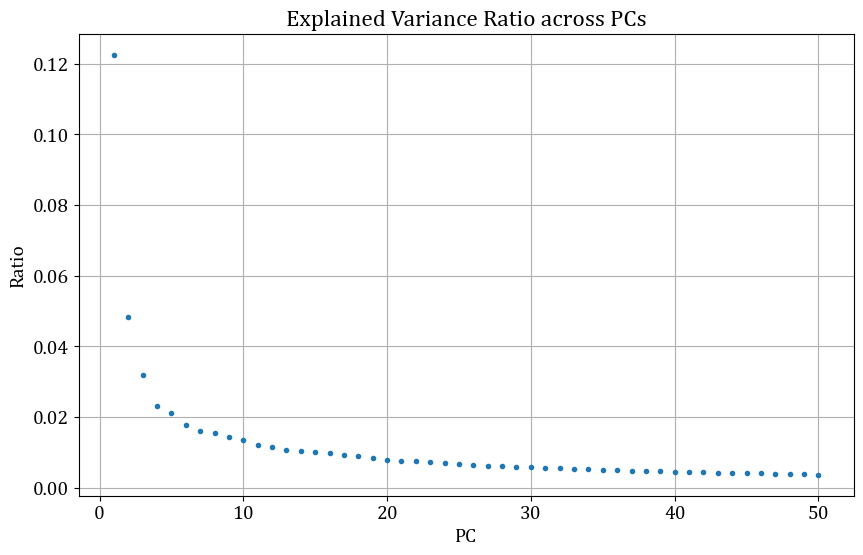

In [36]:
plt.figure()
plt.plot(range(1, 51), pca.explained_variance_ratio_[:50], '.')
plt.title("Explained Variance Ratio across PCs")
plt.ylabel("Ratio")
plt.xlabel("PC")
plt.show()

### 3.1 Logistic Regression

In [43]:
# GridSearch for LR
parameters = {"penalty":["l1", "l2", "elasticnet", None], "C":[0.1, 0.5, 1, 10, 50], "solver":["liblinear","saga"]}
model = LogisticRegression(max_iter=1000, random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_lr_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.487158,0.009982,0.002352,0.001573,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.632353,0.601399,0.691729,0.625000,0.614286,0.632953,0.031185,1
9,2.462932,0.010160,0.002046,0.001360,0.5,l1,saga,"{'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}",0.632353,0.601399,0.691729,0.625000,0.614286,0.632953,0.031185,1
19,1.788927,0.008694,0.003971,0.002882,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
35,1.790197,0.011977,0.002245,0.001149,50,l2,saga,"{'C': 50, 'penalty': 'l2', 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
33,2.447240,0.019095,0.002292,0.000113,50,l1,saga,"{'C': 50, 'penalty': 'l1', 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
31,1.790987,0.007325,0.001900,0.000813,10,None,saga,"{'C': 10, 'penalty': None, 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
27,1.774010,0.004199,0.002797,0.002176,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
25,2.452469,0.013576,0.001625,0.000695,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
23,1.796260,0.018254,0.002310,0.001164,1,None,saga,"{'C': 1, 'penalty': None, 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3
15,1.774446,0.007993,0.001274,0.000454,0.5,None,saga,"{'C': 0.5, 'penalty': None, 'solver': 'saga'}",0.637037,0.601399,0.686567,0.625000,0.614286,0.632858,0.029321,3


In [44]:
# GridSearch for LR, Normalized Data
parameters = {"penalty":["l1", "l2", "elasticnet", None], "C":[0.1, 0.5, 1, 10, 50], "solver":["liblinear","saga"]}

model = LogisticRegression(max_iter=1000, random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_lr_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,157.424108,195.594456,0.002120,0.001089,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.474227,0.461538,0.563107,0.437500,0.427184,0.472711,0.048189,1
8,263.326232,128.079589,0.002295,0.000293,0.5,l1,liblinear,"{'C': 0.5, 'penalty': 'l1', 'solver': 'libline...",0.452830,0.472727,0.517857,0.448598,0.380000,0.454403,0.044574,2
34,0.081500,0.006086,0.002317,0.001133,50,l2,liblinear,"{'C': 50, 'penalty': 'l2', 'solver': 'liblinear'}",0.444444,0.472727,0.495050,0.414414,0.400000,0.445327,0.035310,3
18,0.077171,0.014508,0.001438,0.000456,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.444444,0.477064,0.509804,0.414414,0.368932,0.442932,0.048843,4
2,0.063703,0.004464,0.001451,0.000702,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.444444,0.471698,0.514851,0.411215,0.368932,0.442228,0.049963,5
26,0.079197,0.014608,0.002081,0.000881,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.444444,0.472727,0.495050,0.388889,0.372549,0.434732,0.047211,6
16,139.316159,51.208318,0.004253,0.003631,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.448598,0.440367,0.509091,0.415094,0.333333,0.429297,0.057049,7
10,0.076285,0.002887,0.001601,0.000938,0.5,l2,liblinear,"{'C': 0.5, 'penalty': 'l2', 'solver': 'libline...",0.444444,0.468468,0.480000,0.403670,0.349515,0.429219,0.047658,8
32,4.061916,0.216041,0.006037,0.005228,50,l1,liblinear,"{'C': 50, 'penalty': 'l1', 'solver': 'liblinear'}",0.234043,0.361905,0.360000,0.307692,0.250000,0.302728,0.053487,9
24,6.334609,0.471822,0.002213,0.000834,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.244898,0.288462,0.343434,0.313725,0.312500,0.300604,0.032859,10


In [45]:
# GridSearch for LR, Standard Scaler
parameters = {"lr__penalty":["l1", "l2", "elasticnet", None], "lr__C":[0.1, 0.5, 1, 10, 50], \
              "lr__solver":["liblinear","saga"]}

model = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_lr_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014651,0.000996,0.004568,0.004259,0.1,l1,liblinear,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.618557,0.685714,0.560000,0.631579,0.646465,0.628463,0.040980,1
8,0.029852,0.003186,0.002681,0.001679,0.5,l1,liblinear,"{'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solve...",0.571429,0.647619,0.601942,0.574468,0.633663,0.605824,0.030670,2
1,0.180828,0.007844,0.001911,0.000751,0.1,l1,saga,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.580645,0.640000,0.520833,0.622222,0.618557,0.596451,0.042467,3
9,0.878675,0.063210,0.003320,0.001809,0.5,l1,saga,"{'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solve...",0.563107,0.640777,0.606061,0.549451,0.606061,0.593091,0.032906,4
16,0.030362,0.002539,0.001065,0.000128,1,l1,liblinear,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...",0.557692,0.660194,0.545455,0.500000,0.606061,0.573880,0.054798,5
17,1.526467,0.095471,0.004868,0.003749,1,l1,saga,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...",0.557692,0.613861,0.536082,0.488889,0.606061,0.560517,0.046164,6
24,0.038303,0.005016,0.002161,0.000881,10,l1,liblinear,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",0.524272,0.653061,0.526316,0.483516,0.597938,0.557021,0.060525,7
32,0.033846,0.003079,0.003264,0.002107,50,l1,liblinear,"{'lr__C': 50, 'lr__penalty': 'l1', 'lr__solver...",0.524272,0.618557,0.489796,0.500000,0.589474,0.544420,0.050772,8
25,2.994271,0.025891,0.002135,0.000621,10,l1,saga,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",0.500000,0.483516,0.482759,0.543210,0.511111,0.504119,0.022247,9
33,3.134300,0.028422,0.003866,0.003838,50,l1,saga,"{'lr__C': 50, 'lr__penalty': 'l1', 'lr__solver...",0.241379,0.196721,0.290323,0.262295,0.300000,0.258144,0.037036,10


In [46]:
# GridSearch for LR, Normalized Data, Standard Scaler
parameters = {"lr__penalty":["l1", "l2", "elasticnet", None], "lr__C":[0.1, 0.5, 1, 10, 50], \
              "lr__solver":["liblinear","saga"]}

model = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_lr_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025813,0.005892,0.003964,0.000873,0.1,l1,liblinear,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.618557,0.620000,0.553191,0.590909,0.625000,0.601531,0.026949,1
1,0.642873,0.014920,0.014822,0.003037,0.1,l1,saga,"{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...",0.623656,0.645833,0.545455,0.581395,0.586957,0.596659,0.034917,2
8,0.036107,0.007113,0.003991,0.000981,0.5,l1,liblinear,"{'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solve...",0.634615,0.568421,0.580645,0.527473,0.653061,0.592843,0.045584,3
24,0.045483,0.004491,0.001723,0.000533,10,l1,liblinear,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",0.653846,0.531915,0.571429,0.537634,0.631579,0.585281,0.049305,4
16,0.037973,0.004121,0.002003,0.000743,1,l1,liblinear,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...",0.634615,0.516129,0.571429,0.549451,0.645833,0.583491,0.049683,5
9,2.944714,0.125003,0.012564,0.000747,0.5,l1,saga,"{'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solve...",0.585859,0.543478,0.574713,0.522727,0.638298,0.573015,0.039575,6
32,0.033618,0.003539,0.001200,0.000529,50,l1,liblinear,"{'lr__C': 50, 'lr__penalty': 'l1', 'lr__solver...",0.621359,0.516854,0.568182,0.541176,0.602151,0.569944,0.038288,7
17,3.028304,0.034335,0.009349,0.002433,1,l1,saga,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...",0.604167,0.511111,0.541176,0.500000,0.638298,0.558950,0.053703,8
25,3.098132,0.055936,0.004265,0.003541,10,l1,saga,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",0.400000,0.430380,0.289474,0.388889,0.253521,0.352453,0.068432,9
34,0.041991,0.007976,0.003590,0.000739,50,l2,liblinear,"{'lr__C': 50, 'lr__penalty': 'l2', 'lr__solver...",0.368421,0.365854,0.305556,0.311688,0.264706,0.323245,0.039318,10


---
### 2.2 Random Forest Classifier

In [47]:
# GridSearch for RF
parameters = {'n_estimators':[50, 100, 150], 'min_samples_split':[2, 4], 'max_features':["sqrt", "log2"]}

model = RandomForestClassifier(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "pca_rf_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.281453,0.025822,0.003355,0.000305,sqrt,2,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.602151,0.593407,0.457831,0.507042,0.650602,0.562207,0.069742,8
1,0.540487,0.018108,0.005848,0.000565,sqrt,2,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.606742,0.606742,0.476190,0.586667,0.666667,0.588601,0.062277,2
2,0.816425,0.015977,0.007912,0.000145,sqrt,2,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.608696,0.622222,0.459770,0.567568,0.650602,0.581772,0.066611,4
3,0.273789,0.009992,0.003203,0.000088,sqrt,4,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.584270,0.584270,0.433735,0.486486,0.634146,0.544581,0.073259,10
4,0.543244,0.015794,0.005549,0.000042,sqrt,4,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.615385,0.622222,0.447059,0.552632,0.641975,0.575855,0.071010,5
5,0.818002,0.017845,0.008069,0.000249,sqrt,4,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.623656,0.581395,0.459770,0.506667,0.698795,0.574057,0.084471,6
6,0.123363,0.002341,0.003181,0.000044,log2,2,50,"{'max_features': 'log2', 'min_samples_split': ...",0.551724,0.534884,0.471910,0.422535,0.666667,0.529544,0.082578,12
7,0.247505,0.005924,0.006029,0.000671,log2,2,100,"{'max_features': 'log2', 'min_samples_split': ...",0.568182,0.493827,0.447059,0.507042,0.666667,0.536555,0.075678,11
8,0.368125,0.005391,0.008232,0.000379,log2,2,150,"{'max_features': 'log2', 'min_samples_split': ...",0.593407,0.547619,0.447059,0.540541,0.641026,0.553930,0.064474,9
9,0.122860,0.001591,0.003268,0.000104,log2,4,50,"{'max_features': 'log2', 'min_samples_split': ...",0.608696,0.534884,0.428571,0.550000,0.690476,0.562525,0.086450,7


In [48]:
# GridSearch for RF, Normalized Data
parameters = {'n_estimators':[50, 100, 150], 'min_samples_split':[2, 4], 'max_features':["sqrt", "log2"]}

model = RandomForestClassifier(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "pca_rf_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.292297,0.019023,0.003609,0.000445,sqrt,2,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.645161,0.571429,0.458333,0.523810,0.637363,0.567219,0.070361,11
1,0.588518,0.036822,0.005715,0.000432,sqrt,2,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.638298,0.562500,0.489362,0.567901,0.659341,0.583480,0.060500,10
2,0.848001,0.014394,0.007984,0.000207,sqrt,2,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.645833,0.606061,0.516129,0.597701,0.645833,0.602311,0.047436,5
3,0.285299,0.008774,0.003627,0.000447,sqrt,4,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.632653,0.577320,0.451613,0.578313,0.681319,0.584243,0.076735,8
4,0.563930,0.013055,0.005869,0.000466,sqrt,4,100,"{'max_features': 'sqrt', 'min_samples_split': ...",0.659574,0.653465,0.484211,0.611765,0.630435,0.607890,0.064138,3
5,0.870955,0.028619,0.008728,0.000671,sqrt,4,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.652632,0.653846,0.448980,0.602410,0.659341,0.603442,0.079931,4
6,0.131487,0.003244,0.003746,0.000586,log2,2,50,"{'max_features': 'log2', 'min_samples_split': ...",0.637363,0.521739,0.453608,0.611765,0.604651,0.565825,0.068223,12
7,0.264002,0.009285,0.006555,0.000585,log2,2,100,"{'max_features': 'log2', 'min_samples_split': ...",0.602151,0.597938,0.494845,0.619048,0.620690,0.586934,0.046912,7
8,0.392489,0.005413,0.008429,0.000365,log2,2,150,"{'max_features': 'log2', 'min_samples_split': ...",0.645833,0.632653,0.468085,0.611765,0.620690,0.595805,0.064880,6
9,0.137538,0.004778,0.003852,0.000604,log2,4,50,"{'max_features': 'log2', 'min_samples_split': ...",0.553191,0.574257,0.520833,0.620690,0.652174,0.584229,0.046963,9


In [49]:
# GridSearch for RF, Standard Scaler
parameters = {'rf__n_estimators':[50, 100, 150], 'rf__min_samples_split':[2, 4], \
              'rf__max_features':["sqrt", "log2"]}

model = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "pca_rf_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.271808,0.005884,0.003699,0.000336,sqrt,2,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.604167,0.568182,0.450000,0.492754,0.697674,0.562555,0.086673,7
1,0.553715,0.016566,0.006671,0.000685,sqrt,2,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.600000,0.630435,0.476190,0.547945,0.674699,0.585854,0.068621,2
2,0.845911,0.019743,0.009263,0.000374,sqrt,2,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.615385,0.622222,0.476190,0.520548,0.674699,0.581809,0.072522,5
3,0.287532,0.009804,0.004392,0.000642,sqrt,4,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.580645,0.600000,0.447059,0.552632,0.626506,0.561368,0.062048,8
4,0.592696,0.021735,0.007061,0.000474,sqrt,4,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.593407,0.606742,0.452381,0.520548,0.658824,0.566380,0.072113,6
5,0.885056,0.026722,0.009021,0.000473,sqrt,4,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.623656,0.590909,0.482759,0.540541,0.682927,0.584158,0.068623,3
6,0.127237,0.004049,0.003938,0.000666,log2,2,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.555556,0.613636,0.454545,0.478873,0.623377,0.545197,0.068585,11
7,0.253233,0.005361,0.006645,0.000570,log2,2,100,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.555556,0.530120,0.428571,0.520548,0.674699,0.541899,0.079070,12
8,0.393847,0.019278,0.009248,0.000502,log2,2,150,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.593407,0.581395,0.447059,0.493151,0.649351,0.552872,0.072839,10
9,0.129042,0.002204,0.004076,0.000805,log2,4,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.593407,0.584270,0.439024,0.526316,0.634146,0.555433,0.067629,9


In [50]:
# GridSearch for RF, Normalized Data, Standard Scaler
parameters = {'rf__n_estimators':[50, 100, 150], 'rf__min_samples_split':[2, 4], \
              'rf__max_features':["sqrt", "log2"]}

model = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.to_csv(PSPATH + "pca_rf_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.311255,0.015392,0.004426,0.000544,sqrt,2,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.645161,0.571429,0.453608,0.523810,0.637363,0.566274,0.071833,11
1,0.638532,0.027500,0.006706,0.000673,sqrt,2,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.638298,0.562500,0.489362,0.567901,0.659341,0.583480,0.060500,9
2,0.893369,0.048550,0.008901,0.000547,sqrt,2,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.645833,0.606061,0.510638,0.597701,0.645833,0.601213,0.049440,5
3,0.297610,0.014922,0.004088,0.000535,sqrt,4,50,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.632653,0.577320,0.463158,0.578313,0.681319,0.586552,0.072781,8
4,0.585104,0.025710,0.006728,0.000582,sqrt,4,100,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.659574,0.653465,0.469388,0.611765,0.630435,0.604925,0.069872,3
5,0.885385,0.029112,0.008774,0.000697,sqrt,4,150,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.652632,0.653846,0.453608,0.602410,0.659341,0.604367,0.078143,4
6,0.143485,0.009327,0.003986,0.000440,log2,2,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.637363,0.521739,0.453608,0.611765,0.604651,0.565825,0.068223,12
7,0.265509,0.005291,0.006361,0.000487,log2,2,100,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.602151,0.597938,0.494845,0.619048,0.620690,0.586934,0.046912,7
8,0.391737,0.003911,0.008939,0.000681,log2,2,150,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.645833,0.632653,0.468085,0.611765,0.620690,0.595805,0.064880,6
9,0.139657,0.011128,0.003396,0.000114,log2,4,50,"{'rf__max_features': 'log2', 'rf__min_samples_...",0.553191,0.574257,0.520833,0.620690,0.638298,0.581454,0.043119,10


---
### 2.3 KNN Classifier

In [51]:
# GridSearch for KNN
parameters = {"n_neighbors":[3, 5, 10, 15], "weights": ["uniform", "distance"]}
model = KNeighborsClassifier()
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_knn_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.000825,0.000012,0.004662,0.000594,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.682540,0.641221,0.650407,0.706897,0.660870,0.668387,0.023669,1
5,0.001052,0.000224,0.004086,0.000436,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.666667,0.609929,0.656250,0.699187,0.689076,0.664222,0.031169,2
6,0.000935,0.000149,0.005391,0.000737,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.633803,0.638298,0.656716,0.718750,0.672000,0.663913,0.030617,3
7,0.001217,0.000419,0.004048,0.000300,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.633803,0.638298,0.656716,0.718750,0.672000,0.663913,0.030617,3
2,0.000806,0.000074,0.004741,0.000754,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.646617,0.590909,0.606557,0.710744,0.683761,0.647717,0.045153,5
3,0.001003,0.000311,0.003988,0.000488,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.646617,0.590909,0.606557,0.710744,0.683761,0.647717,0.045153,5
0,0.000951,0.000226,0.004378,0.000204,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.672000,0.592000,0.615385,0.666667,0.666667,0.642544,0.032631,7
1,0.001163,0.000436,0.004148,0.000704,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.672000,0.592000,0.615385,0.666667,0.666667,0.642544,0.032631,7


In [52]:
# GridSearch for KNN, Normalized Data
parameters = {"n_neighbors":[3, 5, 10, 15], "weights": ["uniform", "distance"]}
model = KNeighborsClassifier()
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_knn_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.000906,0.000100,0.004009,0.000375,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.619718,0.598639,0.593103,0.676259,0.704000,0.638344,0.044087,1
2,0.000998,0.000069,0.005363,0.000732,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.609929,0.643836,0.619718,0.618705,0.682540,0.634946,0.026327,2
3,0.001027,0.000096,0.004200,0.001053,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.609929,0.643836,0.619718,0.618705,0.682540,0.634946,0.026327,2
0,0.000999,0.000161,0.004834,0.000600,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.602941,0.642857,0.656716,0.637681,0.617886,0.631616,0.018994,4
1,0.001125,0.000187,0.004375,0.000299,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.602941,0.642857,0.656716,0.637681,0.617886,0.631616,0.018994,4
6,0.000827,0.000032,0.004647,0.000641,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.612245,0.597222,0.613333,0.666667,0.656250,0.629143,0.027193,6
7,0.000924,0.000085,0.004277,0.000428,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.612245,0.597222,0.613333,0.666667,0.656250,0.629143,0.027193,6
4,0.000827,0.000080,0.004637,0.000330,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.633094,0.594203,0.589928,0.671756,0.614035,0.620603,0.029845,8


In [53]:
# GridSearch for KNN, Standard Scaler
parameters = {"knn__n_neighbors":[3, 5, 10, 15], "knn__weights": ["uniform", "distance"]}
model = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_knn_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.003422,0.000218,0.004689,0.000784,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.161290,0.586826,0.578035,0.578035,0.560606,0.492958,0.166052,1
3,0.003587,0.000369,0.003794,0.000401,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.161290,0.586826,0.578035,0.578035,0.560606,0.492958,0.166052,1
0,0.003359,0.000412,0.004541,0.000407,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.222222,0.564706,0.589595,0.578035,0.492308,0.489373,0.137810,3
1,0.003670,0.000486,0.004198,0.000659,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.222222,0.564706,0.589595,0.578035,0.492308,0.489373,0.137810,3
5,0.003516,0.000380,0.004040,0.000682,10,distance,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",0.109091,0.568047,0.578035,0.578035,0.562500,0.479142,0.185122,5
6,0.003344,0.000300,0.004742,0.000361,15,uniform,"{'knn__n_neighbors': 15, 'knn__weights': 'unif...",0.000000,0.562500,0.586207,0.578035,0.600000,0.465348,0.232991,6
7,0.003534,0.000463,0.004890,0.000534,15,distance,"{'knn__n_neighbors': 15, 'knn__weights': 'dist...",0.000000,0.562500,0.586207,0.578035,0.600000,0.465348,0.232991,6
4,0.003226,0.000336,0.004564,0.000344,10,uniform,"{'knn__n_neighbors': 10, 'knn__weights': 'unif...",0.000000,0.575163,0.578035,0.578035,0.571429,0.460532,0.230279,8


In [54]:
# GridSearch for KNN, Normalized Data, Standard Scaler
parameters = {"knn__n_neighbors":[3, 5, 10, 15], "knn__weights": ["uniform", "distance"]}
model = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_knn_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004303,0.000809,0.006182,0.001233,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.004314,0.000940,0.004025,0.000298,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.003593,0.000555,0.004512,0.000270,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.003788,0.000546,0.004515,0.000333,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.003424,0.000437,0.004610,0.000680,10,uniform,"{'knn__n_neighbors': 10, 'knn__weights': 'unif...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.003896,0.000244,0.004028,0.000624,10,distance,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.003159,0.000269,0.004491,0.000479,15,uniform,"{'knn__n_neighbors': 15, 'knn__weights': 'unif...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.003445,0.000306,0.003938,0.000480,15,distance,"{'knn__n_neighbors': 15, 'knn__weights': 'dist...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


---
### 2.4 SVM Classifier

In [55]:
# GridSearch for SVM
parameters = {"C":[0.1, 0.5, 1, 10, 50], "kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "degree": [3, 5, 10, 20], "decision_function_shape": ["ovo", "ovr"], \
              "gamma": ["auto", "scale"]}
model = SVC(random_state=42)
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_svc_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
129,0.091472,0.000235,0.020498,0.000070,1,ovo,3,auto,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",0.700855,0.690265,0.661157,0.597701,0.723404,0.674677,0.043384,1
161,0.092100,0.000702,0.020785,0.000308,1,ovr,3,auto,poly,"{'C': 1, 'decision_function_shape': 'ovr', 'de...",0.700855,0.690265,0.661157,0.597701,0.723404,0.674677,0.043384,1
225,0.094447,0.001287,0.021944,0.001057,10,ovr,3,auto,poly,"{'C': 10, 'decision_function_shape': 'ovr', 'd...",0.700855,0.690265,0.661157,0.597701,0.723404,0.674677,0.043384,1
289,0.095326,0.001646,0.021962,0.000814,50,ovr,3,auto,poly,"{'C': 50, 'decision_function_shape': 'ovr', 'd...",0.700855,0.690265,0.661157,0.597701,0.723404,0.674677,0.043384,1
257,0.091295,0.000362,0.020493,0.000066,50,ovo,3,auto,poly,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",0.700855,0.690265,0.661157,0.597701,0.723404,0.674677,0.043384,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.001461,0.000101,0.000000,0.000000,50,ovo,20,auto,poly,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
81,0.002793,0.000506,0.000000,0.000000,0.5,ovo,10,auto,poly,"{'C': 0.5, 'decision_function_shape': 'ovo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
209,0.002397,0.000145,0.000000,0.000000,10,ovo,10,auto,poly,"{'C': 10, 'decision_function_shape': 'ovo', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
153,0.001473,0.000121,0.000000,0.000000,1,ovo,20,auto,poly,"{'C': 1, 'decision_function_shape': 'ovo', 'de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301


In [56]:
# GridSearch for SVM, Normalized Data
parameters = {"C":[0.1, 0.5, 1, 10, 50], "kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "degree": [3, 5, 10, 20], "decision_function_shape": ["ovo", "ovr"], \
              "gamma": ["auto", "scale"]}
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_svc_norm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
193,0.092107,0.002335,0.017218,0.000808,10,ovo,3,auto,poly,"{'C': 10, 'decision_function_shape': 'ovo', 'd...",0.470588,0.461538,0.54902,0.533333,0.505051,0.503906,0.034081,1
65,0.090874,0.000747,0.016728,0.000183,0.5,ovo,3,auto,poly,"{'C': 0.5, 'decision_function_shape': 'ovo', '...",0.470588,0.461538,0.54902,0.533333,0.505051,0.503906,0.034081,1
257,0.091913,0.001062,0.017155,0.000641,50,ovo,3,auto,poly,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",0.470588,0.461538,0.54902,0.533333,0.505051,0.503906,0.034081,1
97,0.091181,0.000796,0.016851,0.000180,0.5,ovr,3,auto,poly,"{'C': 0.5, 'decision_function_shape': 'ovr', '...",0.470588,0.461538,0.54902,0.533333,0.505051,0.503906,0.034081,1
289,0.090568,0.000442,0.016650,0.000086,50,ovr,3,auto,poly,"{'C': 50, 'decision_function_shape': 'ovr', 'd...",0.470588,0.461538,0.54902,0.533333,0.505051,0.503906,0.034081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.001339,0.000080,0.000000,0.000000,50,ovo,10,auto,poly,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
57,0.001344,0.000083,0.000000,0.000000,0.1,ovr,20,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
49,0.001456,0.000183,0.000000,0.000000,0.1,ovr,10,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
17,0.001337,0.000080,0.000000,0.000000,0.1,ovo,10,auto,poly,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301


In [57]:
# GridSearch for SVM, Standard Scaler
parameters = {"svc__C":[0.1, 0.5, 1, 10, 50], "svc__kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "svc__degree": [3, 5, 10, 20], "svc__decision_function_shape": ["ovo", "ovr"], \
              "svc__gamma": ["auto", "scale"]}
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_svc_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__decision_function_shape,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094413,0.000610,0.023320,0.000412,0.1,ovo,3,auto,linear,"{'svc__C': 0.1, 'svc__decision_function_shape'...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
217,0.094383,0.001123,0.022902,0.000067,10,ovo,20,auto,poly,"{'svc__C': 10, 'svc__decision_function_shape':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
216,0.093616,0.000942,0.023100,0.000343,10,ovo,20,auto,linear,"{'svc__C': 10, 'svc__decision_function_shape':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
215,0.096939,0.001128,0.023394,0.000123,10,ovo,10,scale,sigmoid,"{'svc__C': 10, 'svc__decision_function_shape':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
214,0.098364,0.001009,0.035360,0.000379,10,ovo,10,scale,rbf,"{'svc__C': 10, 'svc__decision_function_shape':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.096414,0.000714,0.023795,0.000941,0.5,ovr,3,scale,sigmoid,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
102,0.099892,0.001866,0.035634,0.000337,0.5,ovr,3,scale,rbf,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
101,0.096004,0.001007,0.023492,0.000477,0.5,ovr,3,scale,poly,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
318,0.101510,0.003235,0.035759,0.000881,50,ovr,20,scale,rbf,"{'svc__C': 50, 'svc__decision_function_shape':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [60]:
# GridSearch for SVM, Normalized Data, Standard Scaler
parameters = {"svc__C":[0.1, 0.5, 1, 10, 50], "svc__kernel": ["linear", "poly", "rbf", "sigmoid"], \
              "svc__degree": [3, 5, 10, 20], "svc__decision_function_shape": ["ovo", "ovr"], \
              "svc__gamma": ["auto", "scale"]}
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=42))])
gscv = GridSearchCV(model, parameters, scoring="f1")
gscv.fit(X_train_norm_transformed, y_train)

df = pd.DataFrame(gscv.cv_results_)
df.sort_values("rank_test_score", inplace=True)
df.to_csv(PSPATH + "pca_svc_norm_standard_scaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__decision_function_shape,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
234,0.099025,0.002621,0.035306,0.000489,10.0,ovr,5,auto,rbf,"{'svc__C': 10, 'svc__decision_function_shape':...",0.574713,0.37037,0.345679,0.371429,0.328767,0.398192,0.089696,1
266,0.098526,0.000987,0.035500,0.000462,50.0,ovo,5,auto,rbf,"{'svc__C': 50, 'svc__decision_function_shape':...",0.574713,0.37037,0.345679,0.371429,0.328767,0.398192,0.089696,1
278,0.097075,0.000193,0.034968,0.000101,50.0,ovo,10,scale,rbf,"{'svc__C': 50, 'svc__decision_function_shape':...",0.574713,0.37037,0.345679,0.371429,0.328767,0.398192,0.089696,1
262,0.096881,0.000303,0.034913,0.000069,50.0,ovo,3,scale,rbf,"{'svc__C': 50, 'svc__decision_function_shape':...",0.574713,0.37037,0.345679,0.371429,0.328767,0.398192,0.089696,1
282,0.102183,0.001764,0.036651,0.000595,50.0,ovo,20,auto,rbf,"{'svc__C': 50, 'svc__decision_function_shape':...",0.574713,0.37037,0.345679,0.371429,0.328767,0.398192,0.089696,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.092626,0.000179,0.022842,0.000095,0.5,ovo,5,auto,poly,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,193
113,0.093713,0.000521,0.022855,0.000104,0.5,ovr,10,auto,poly,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,193
75,0.093293,0.000502,0.022833,0.000230,0.5,ovo,5,auto,sigmoid,"{'svc__C': 0.5, 'svc__decision_function_shape'...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,193
63,0.098649,0.001606,0.024076,0.000516,0.1,ovr,20,scale,sigmoid,"{'svc__C': 0.1, 'svc__decision_function_shape'...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,193
